<a href="https://colab.research.google.com/github/Alton01/autism_prediction_ml_model/blob/main/autism_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [2]:
df = pd.read_csv('autism_prediction.csv')

In [3]:
df.shape

(800, 22)

In [4]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [5]:
#display all the colums of dataframe
pd.set_option('display.max_columns', None)

In [6]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [8]:
# convert age column to integer

df['age'] = df['age'].astype(int)

In [9]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [10]:
# to discover categorical and numerical values and know the unique values

for col in df.columns:
  numerical_features = ["ID", "age", "result"]
  if col not in numerical_features:
    print(col, df[col].unique())
    print("." * 50)


A1_Score [1 0]
..................................................
A2_Score [0 1]
..................................................
A3_Score [1 0]
..................................................
A4_Score [0 1]
..................................................
A5_Score [1 0]
..................................................
A6_Score [0 1]
..................................................
A7_Score [1 0]
..................................................
A8_Score [0 1]
..................................................
A9_Score [1 0]
..................................................
A10_Score [1 0]
..................................................
gender ['f' 'm']
..................................................
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
..................................................
jaundice ['no' 'yes']
..................................................
austim

In [11]:
df = df.drop(columns = ['ID', 'age_desc'])

In [12]:
df.shape

(800, 20)

In [13]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [14]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [15]:
mapping = {
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}

df['contry_of_res'] = df['contry_of_res'].replace(mapping)

In [16]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [17]:
# to check target class distribution for class imbalance

df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


In [18]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


In [19]:
# univariate analysis


In [20]:
sns.set_theme(style = 'darkgrid')

Mean 27.96375
Median 24.0


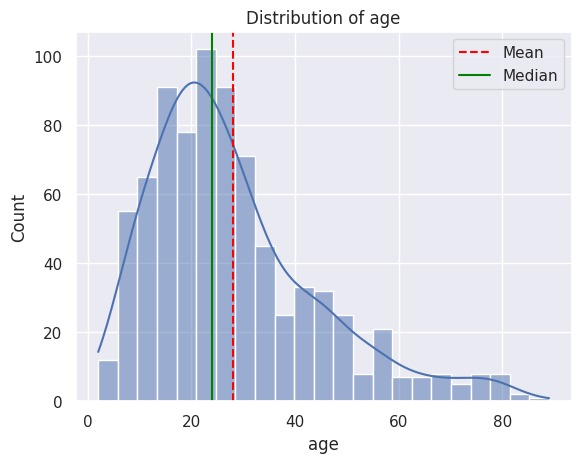

In [21]:
# if mean is less than median, its left skewed. if mean isgreater, its right skewed
sns.histplot(df['age'], kde=True)
plt.title('Distribution of age')

age_mean = df['age'].mean()
age_median = df['age'].median()

print("Mean", age_mean)
print("Median", age_median)

# add vertical lines for mean and median

plt.axvline(age_mean, color='red', linestyle='--', label="Mean")
plt.axvline(age_median, color='green', linestyle='-', label="Median")

plt.legend()
plt.show()

Mean 8.537303106501248
Median 9.605299308


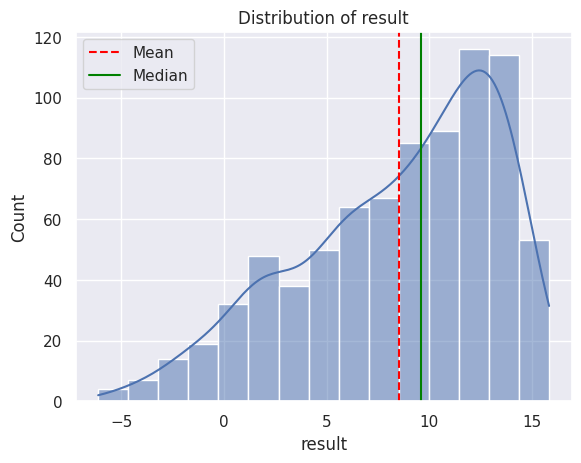

In [22]:
sns.histplot(df['result'], kde=True)
plt.title('Distribution of result')

result_mean = df['result'].mean()
result_median = df['result'].median()

print("Mean", result_mean)
print("Median", result_median)

# add vertical lines for mean and median

plt.axvline(result_mean, color='red', linestyle='--', label="Mean")
plt.axvline(result_median, color='green', linestyle='-', label="Median")

plt.legend()
plt.show()

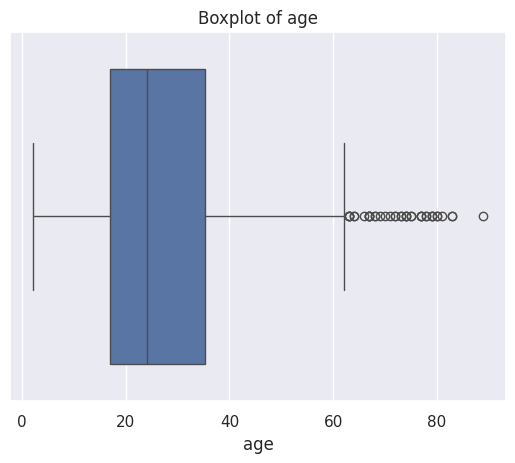

In [23]:
# box plot for identifying outliers in numerical columns

sns.boxplot(x=df['age'])
plt.title('Boxplot of age')
plt.xlabel('age')
plt.show()

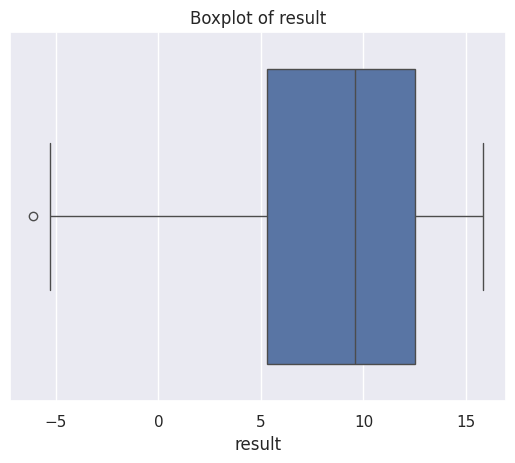

In [24]:
sns.boxplot(x=df['result'])
plt.title('Boxplot of result')
plt.xlabel('result')
plt.show()

In [25]:
#count the age outliers using IQR method

Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

age_outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

In [26]:
# mean is affected by outlier, while median is not affected by outliers.
len(age_outliers)

39

In [27]:
#count the result outliers using IQR method

Q1 = df['result'].quantile(0.25)
Q3 = df['result'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

result_outliers = df[(df['result'] < lower_bound) | (df['result'] > upper_bound)]

In [28]:
len(result_outliers)

1

In [29]:
# tree based models are not really affected by outliers in comparison to logistic/linear regression.

In [30]:
#univariate analysis for categorical columns

In [31]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

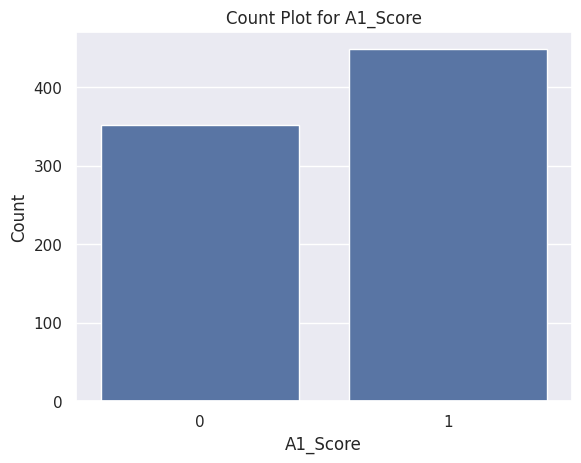

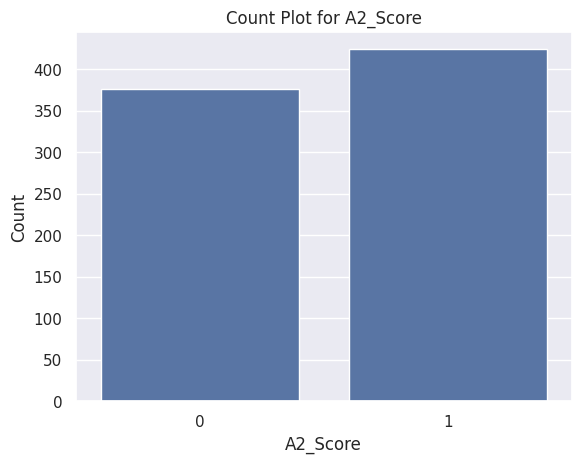

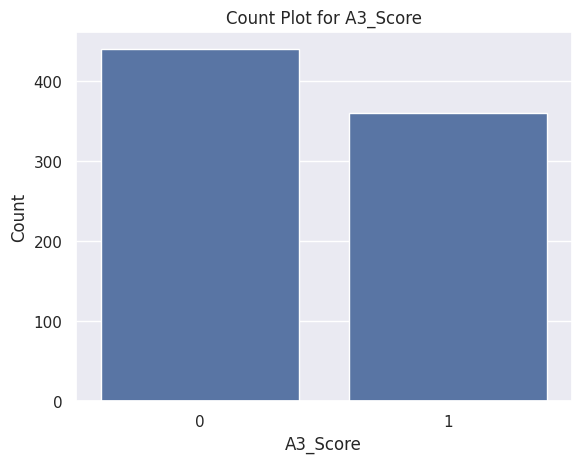

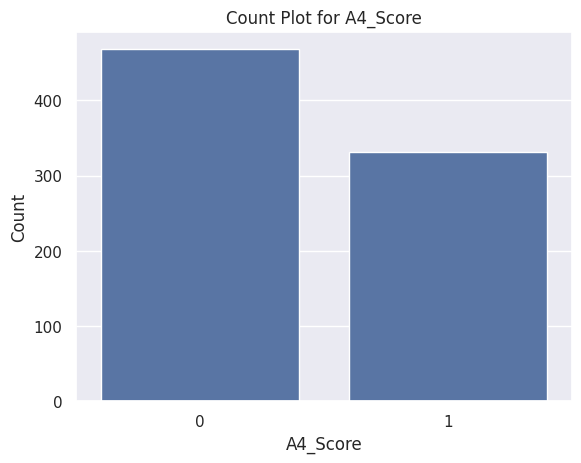

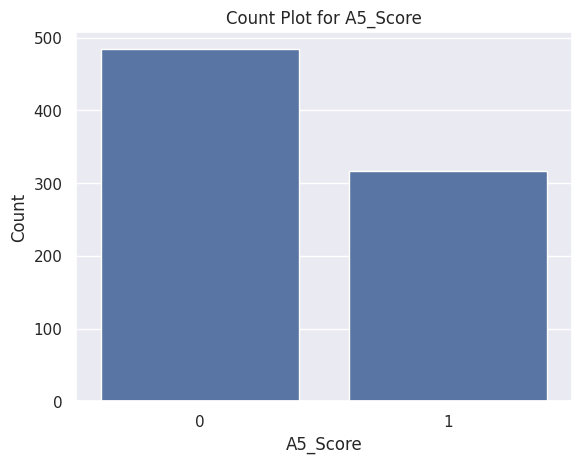

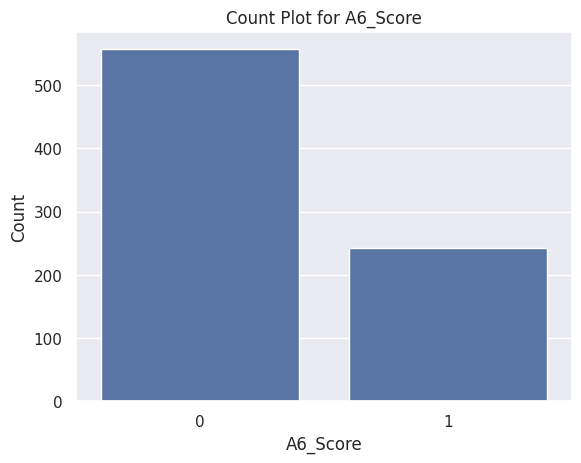

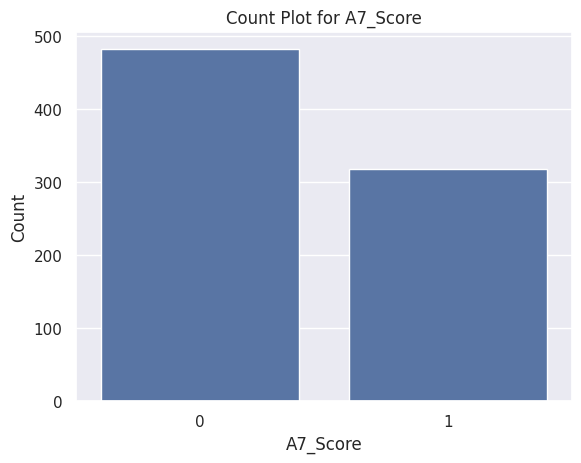

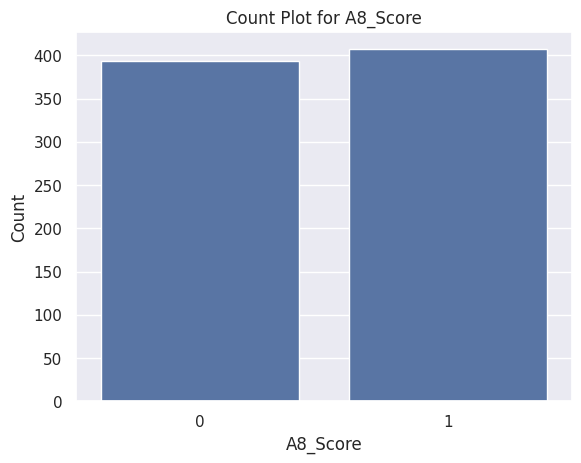

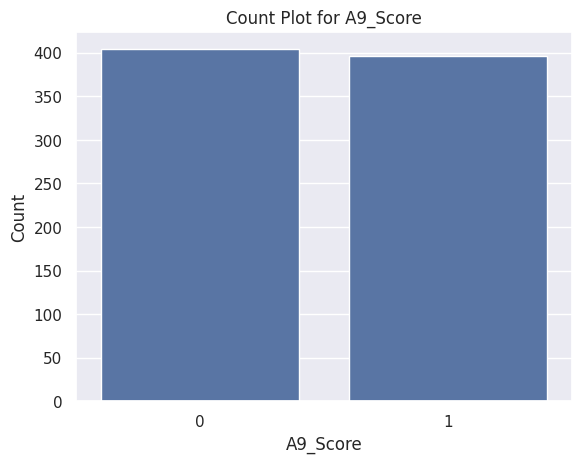

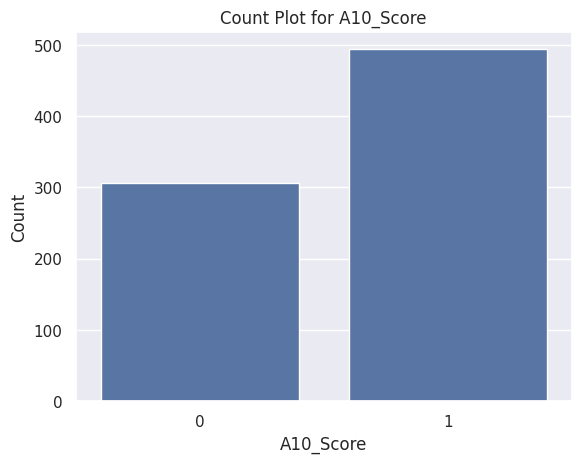

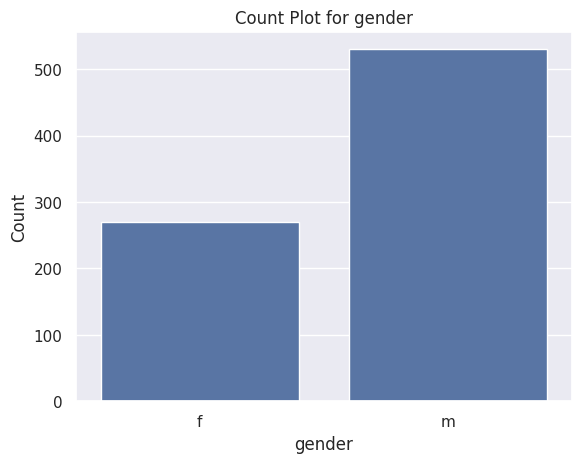

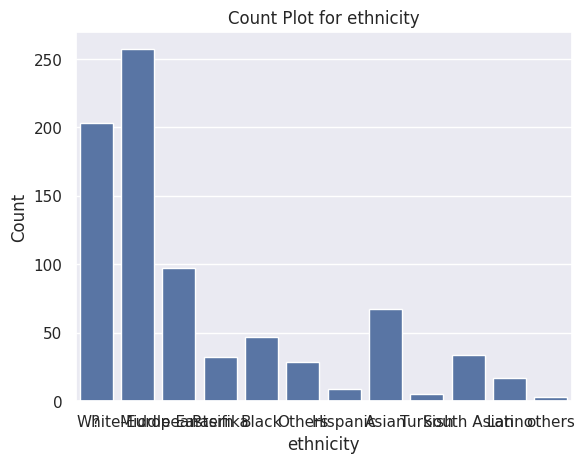

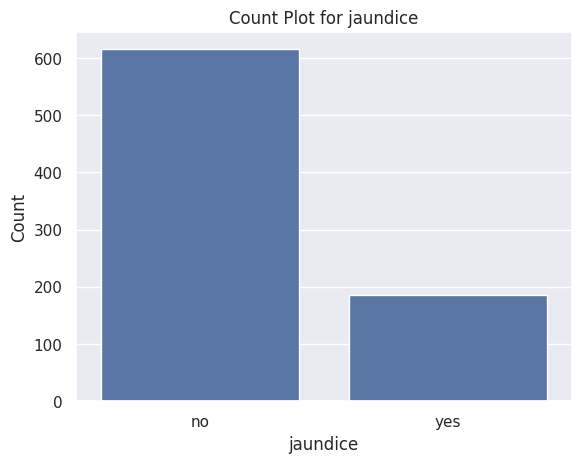

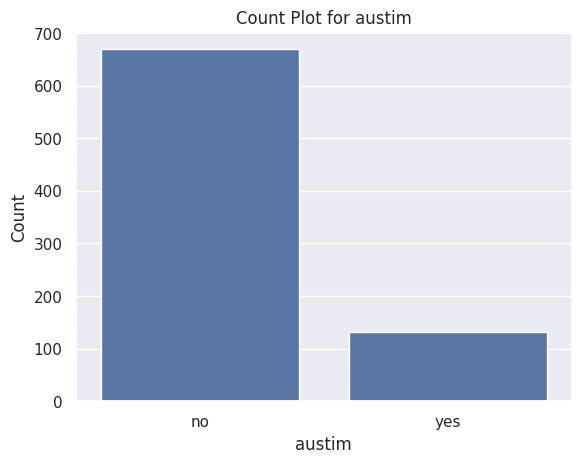

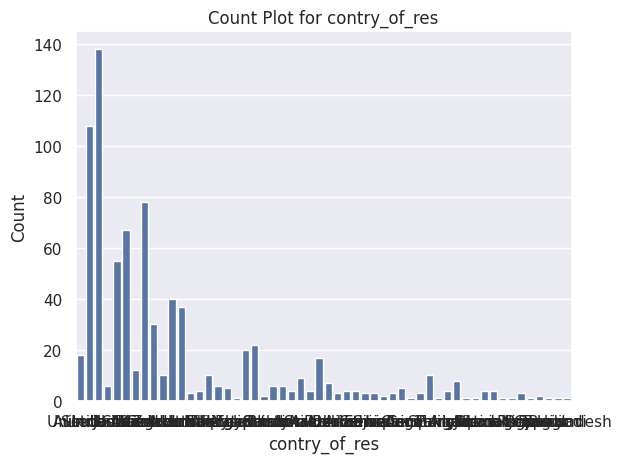

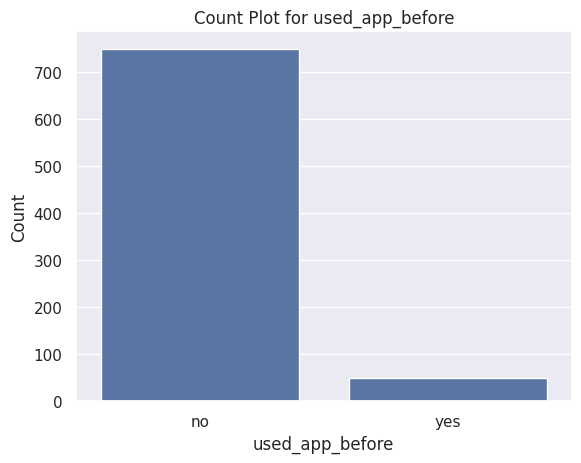

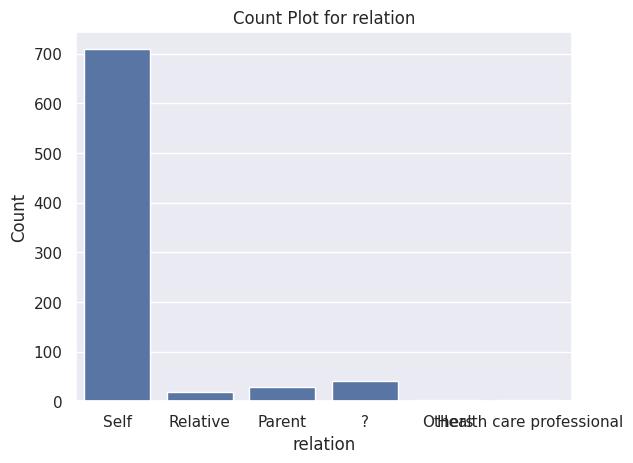

In [32]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation']

for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(f"Count Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

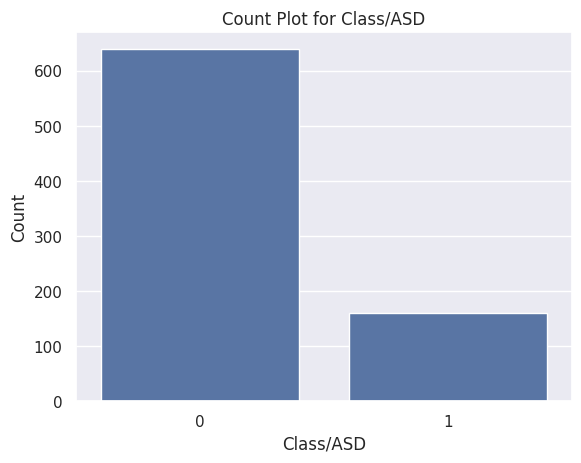

In [33]:
# count plot for target column

sns.countplot(x=df['Class/ASD'])
plt.title("Count Plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [34]:
# handle ( ? ) missing values in ethnicity and relation column
# we would set ? values to others.

df['ethnicity'] = df['ethnicity'].replace({'?': 'Others', 'others' : 'Others'})
df['relation'] = df['relation'].replace(
    {'?': 'Others',
     'Relative': 'Others',
     'Parent': 'Others',
     'Health care professional': 'Others'})

In [35]:
df['ethnicity'].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [36]:
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [37]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0


In [39]:
#label encoding
# identify columns with object datatype

object_columns = df.select_dtypes(include=['object']).columns


In [40]:
object_columns

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')

In [41]:
# initialize a dictionary to store the encoders

encoders= {}

# apply label encoding and store the encoders

for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder

# save the encoders as a pickle file

with open('encoders.pkl', 'wb') as f:
  pickle.dump(encoders, f)

In [42]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [43]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0


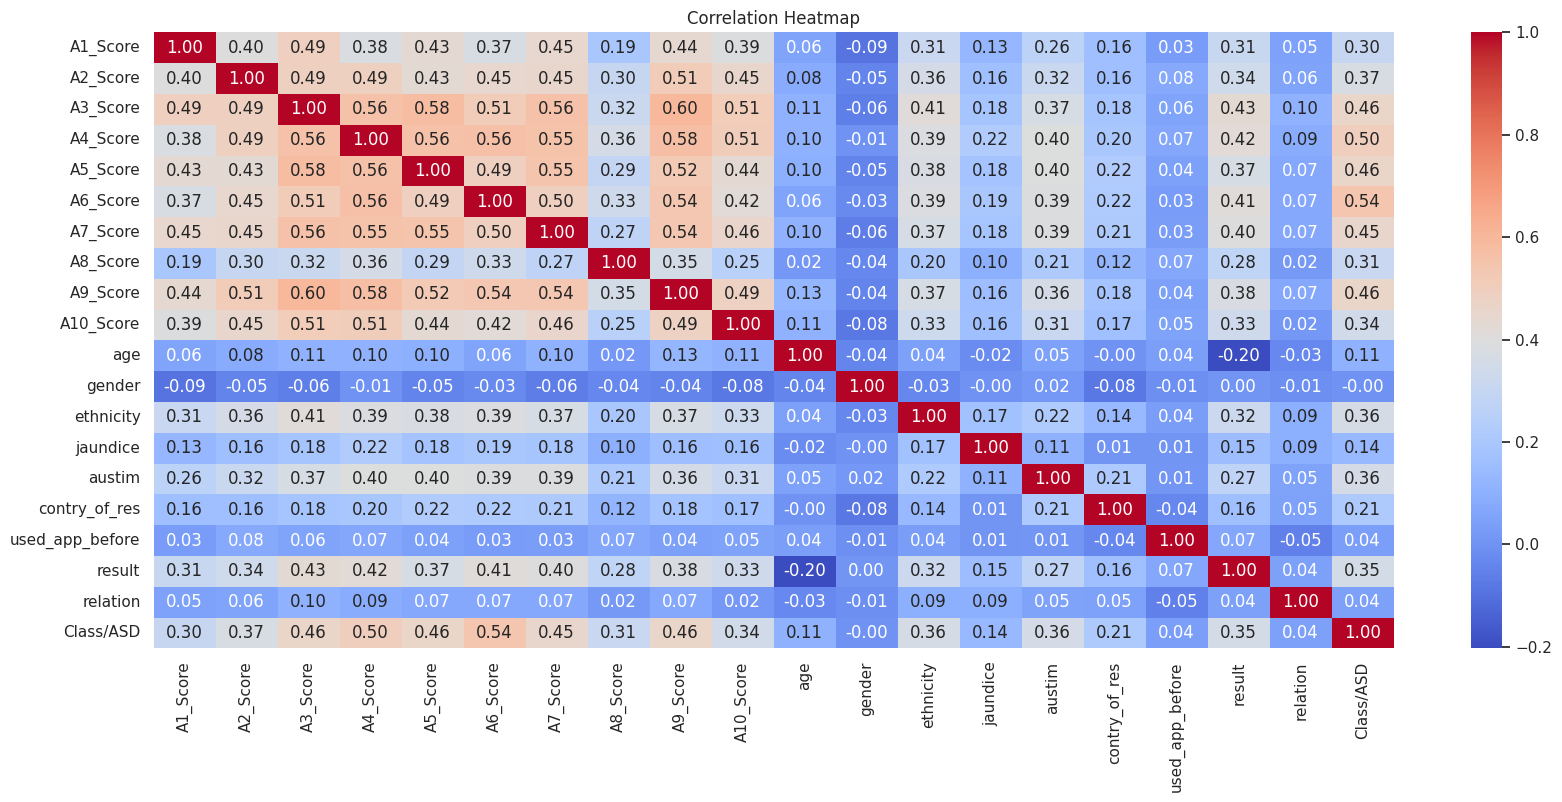

In [45]:
# Bivaraite Analysis
# correlation heatmap

plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [46]:
# handling outliers. Interquartile Range (IQR)
# replace outliers with median function

def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df[column].median()

    # replace outliers with median value

    df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

    return df

In [48]:
#mean is sensitive to outliers while median is not.
df = replace_outliers_with_median(df, 'age')

df = replace_outliers_with_median(df, 'result')

In [49]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0


In [50]:
df.shape

(800, 20)

In [51]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [52]:
X = df.drop(columns = ['Class/ASD'])
y = df['Class/ASD']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [57]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [58]:
y_test.value_counts()

,count
Class/ASD,
0,124
1,36


In [59]:
#SMOTE - Synthetic Minority Over Sampling Technique.

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [60]:
y_train_smote.value_counts()

,count
Class/ASD,
1,515
0,515


In [62]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [63]:
# dictionary to store the cross validation results.

cv_scores = {}

for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")

  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

  cv_scores[model_name] = scores

  print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f} " )
  print("-" * 50)

Training Decision Tree with default parameters
Decision Tree Cross-Validation Accuracy: 0.83 
--------------------------------------------------
Training Random Forest with default parameters
Random Forest Cross-Validation Accuracy: 0.91 
--------------------------------------------------
Training XGBoost with default parameters
XGBoost Cross-Validation Accuracy: 0.90 
--------------------------------------------------


In [64]:
cv_scores

{'Decision Tree': array([0.7961165 , 0.84466019, 0.84951456, 0.8592233 , 0.81553398]),
 'Random Forest': array([0.90776699, 0.92718447, 0.90776699, 0.91262136, 0.90776699]),
 'XGBoost': array([0.87864078, 0.91262136, 0.89805825, 0.90776699, 0.91262136])}

In [69]:
# initialize model

decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [67]:
# set param grid for different models

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 50, 70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}



In [70]:
# implement hyper parameter tuning

random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=10, cv=5, scoring='accuracy', random_state=42)

random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=10, cv=5, scoring='accuracy', random_state=42)

random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_xgb, n_iter=10, cv=5, scoring='accuracy', random_state=42)



In [71]:
# Fit the model

random_search_dt.fit(X_train_smote, y_train_smote)
random_search_rf.fit(X_train_smote, y_train_smote)
random_search_xgb.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [72]:
# checking for best model with best score amongst the 3 models.
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
  best_model = random_search_dt.best_estimator_
  best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
  best_model = random_search_rf.best_estimator_
  best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
  best_model = random_search_xgb.best_estimator_
  best_score = random_search_xgb.best_score_


In [74]:
print(f"Best Model: {best_model}")
print(f"Best Cross Validation Accuracy: {best_score:.2f}")

Best Model: RandomForestClassifier(bootstrap=False, max_depth=10, random_state=42)
Best Cross Validation Accuracy: 0.92


In [75]:
# save the best model as a pickle file

with open('best_model.pkl', 'wb') as f:
  pickle.dump(best_model, f)

In [77]:
# evaluate model on test_data
# confusion matrix shows the counts of true positive, true negative, false positive, and false negative predictions.
# classification report provides a summary of key classification metrics such as precision, recall, F1-score, and support for each class.

y_test_pred = best_model.predict(X_test)
print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.825
Confusion Matrix:
 [[108  16]
 [ 12  24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89       124
           1       0.60      0.67      0.63        36

    accuracy                           0.82       160
   macro avg       0.75      0.77      0.76       160
weighted avg       0.83      0.82      0.83       160

